# APS 5 - Questões com auxílio do Pandas

** Nomes: ** <font color=blue> Jorge Ehrhardt</font>, <font color=blue> Vitor Liu </font>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats

In [2]:
#Abrir o arquivo
df = pd.read_csv('LoL.csv')
#listar colunas
df.head()

,MatchHistory,League,Season,Year,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupportChamp,redSupport,goldredSupport,redBans
0,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Hai,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",Thresh,LemonNation,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']"
1,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Shiphtur,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",Annie,KiWiKiD,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']"
2,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Keane,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",Janna,BunnyFuFuu,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']"
3,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Fenix,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Janna,Xpecial,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']"
4,http://matchhistory.na.leagueoflegends.com/en/...,North_America,Spring_Season,2015,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Slooshi8,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Annie,Dodo8,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']"


In [64]:
#Considerar os playoffs como parte da season
df["Season"] = df["Season"].replace("Spring_Playoffs", "Spring_Season")
df["Season"] = df["Season"].replace("Summer_Playoffs", "Summer_Season")
df["Season"] = df["Season"].replace("Winter_Playoffs", "Winter_Season")
#Trabalhar apenas com a coluna "redTeamTag"
df["redTeamTag"] = df["redTeamTag"].astype("category")
df["redTeamTag"] = df["redTeamTag"].str.upper()
#Times que trocaram de nome
df["redTeamTag"] = df["redTeamTag"].replace("LONGZHU", "LW")
df["redTeamTag"] = df["redTeamTag"].replace("YOEFW", "FW")
df["redTeamTag"] = df["redTeamTag"].replace("VFK", "KST")
df["redTeamTag"] = df["redTeamTag"].replace("HKES", "HKE")
df["redTeamTag"] = df["redTeamTag"].replace("CJE", "CJ")

# Dados gerais

### Quantidade de vitórias por lado

In [3]:
bwin = df["bResult"].value_counts()[0]
rwin = df["bResult"].value_counts()[1]
print("Vitórias time azul: {}" .format(bwin))
print("Vitórias time vermelho: {}" .format(rwin))

Vitórias time azul: 1729
Vitórias time vermelho: 2073


### Times e quantidades de jogos

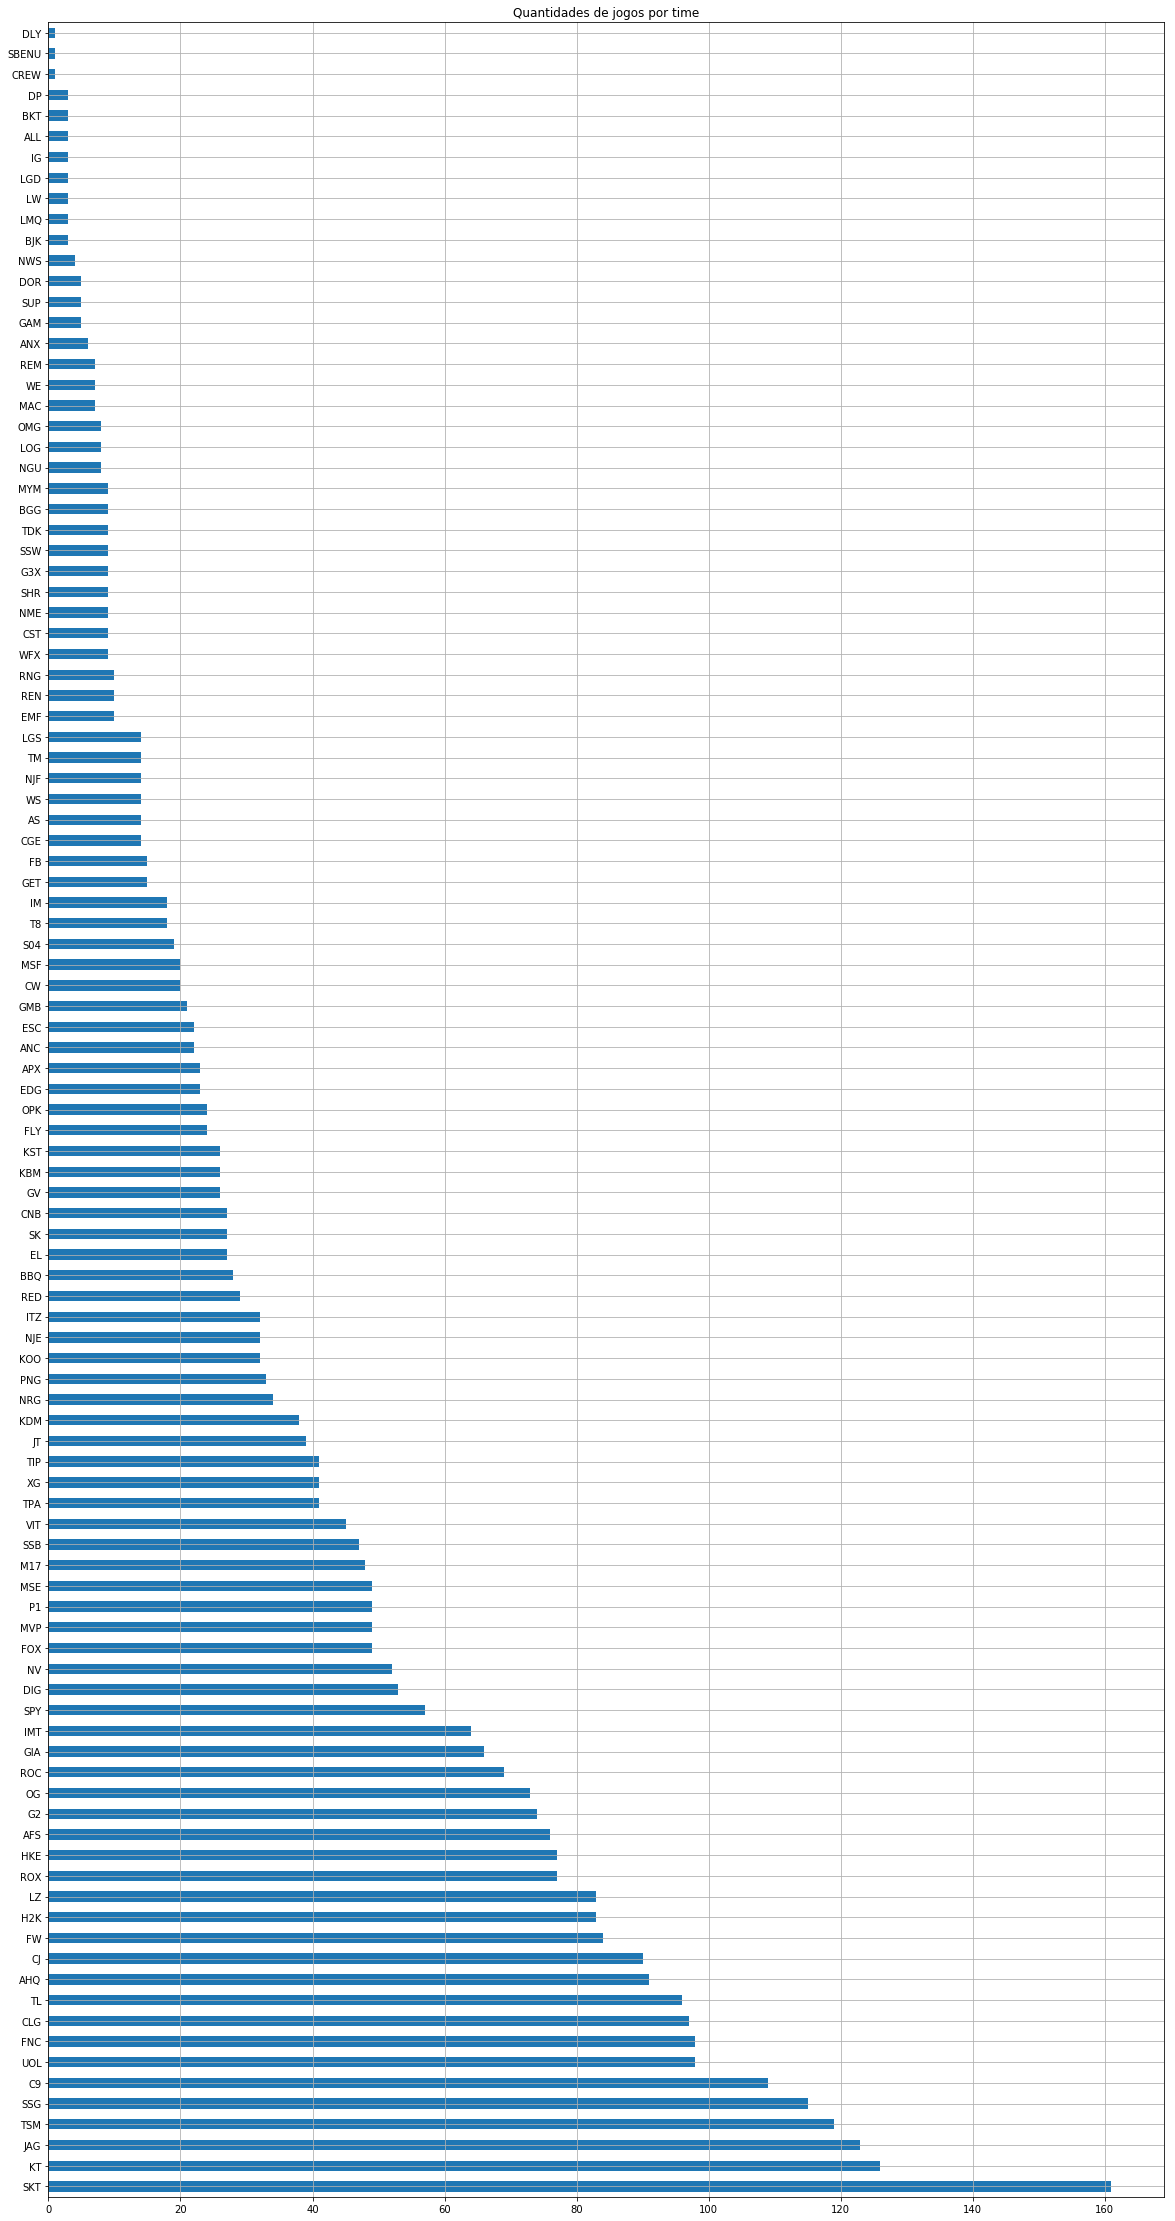

In [5]:
pd.value_counts(df["redTeamTag"].values, sort=True).plot.barh(figsize=(20,40), grid=True, title="Quantidades de jogos por time")

### Times e quantidades de vitórias e derrotas

In [6]:
dic = {}
b = sorted(df["redTeamTag"].unique())

for i in b:
    if i not in dic:
        dic[i] = [0,0]
    for j in range(len(df)):
        if df["redTeamTag"][j] == i:
            if df["rResult"][j] == 1:
                dic[i][0] += 1
            else:
                dic[i][1] += 1

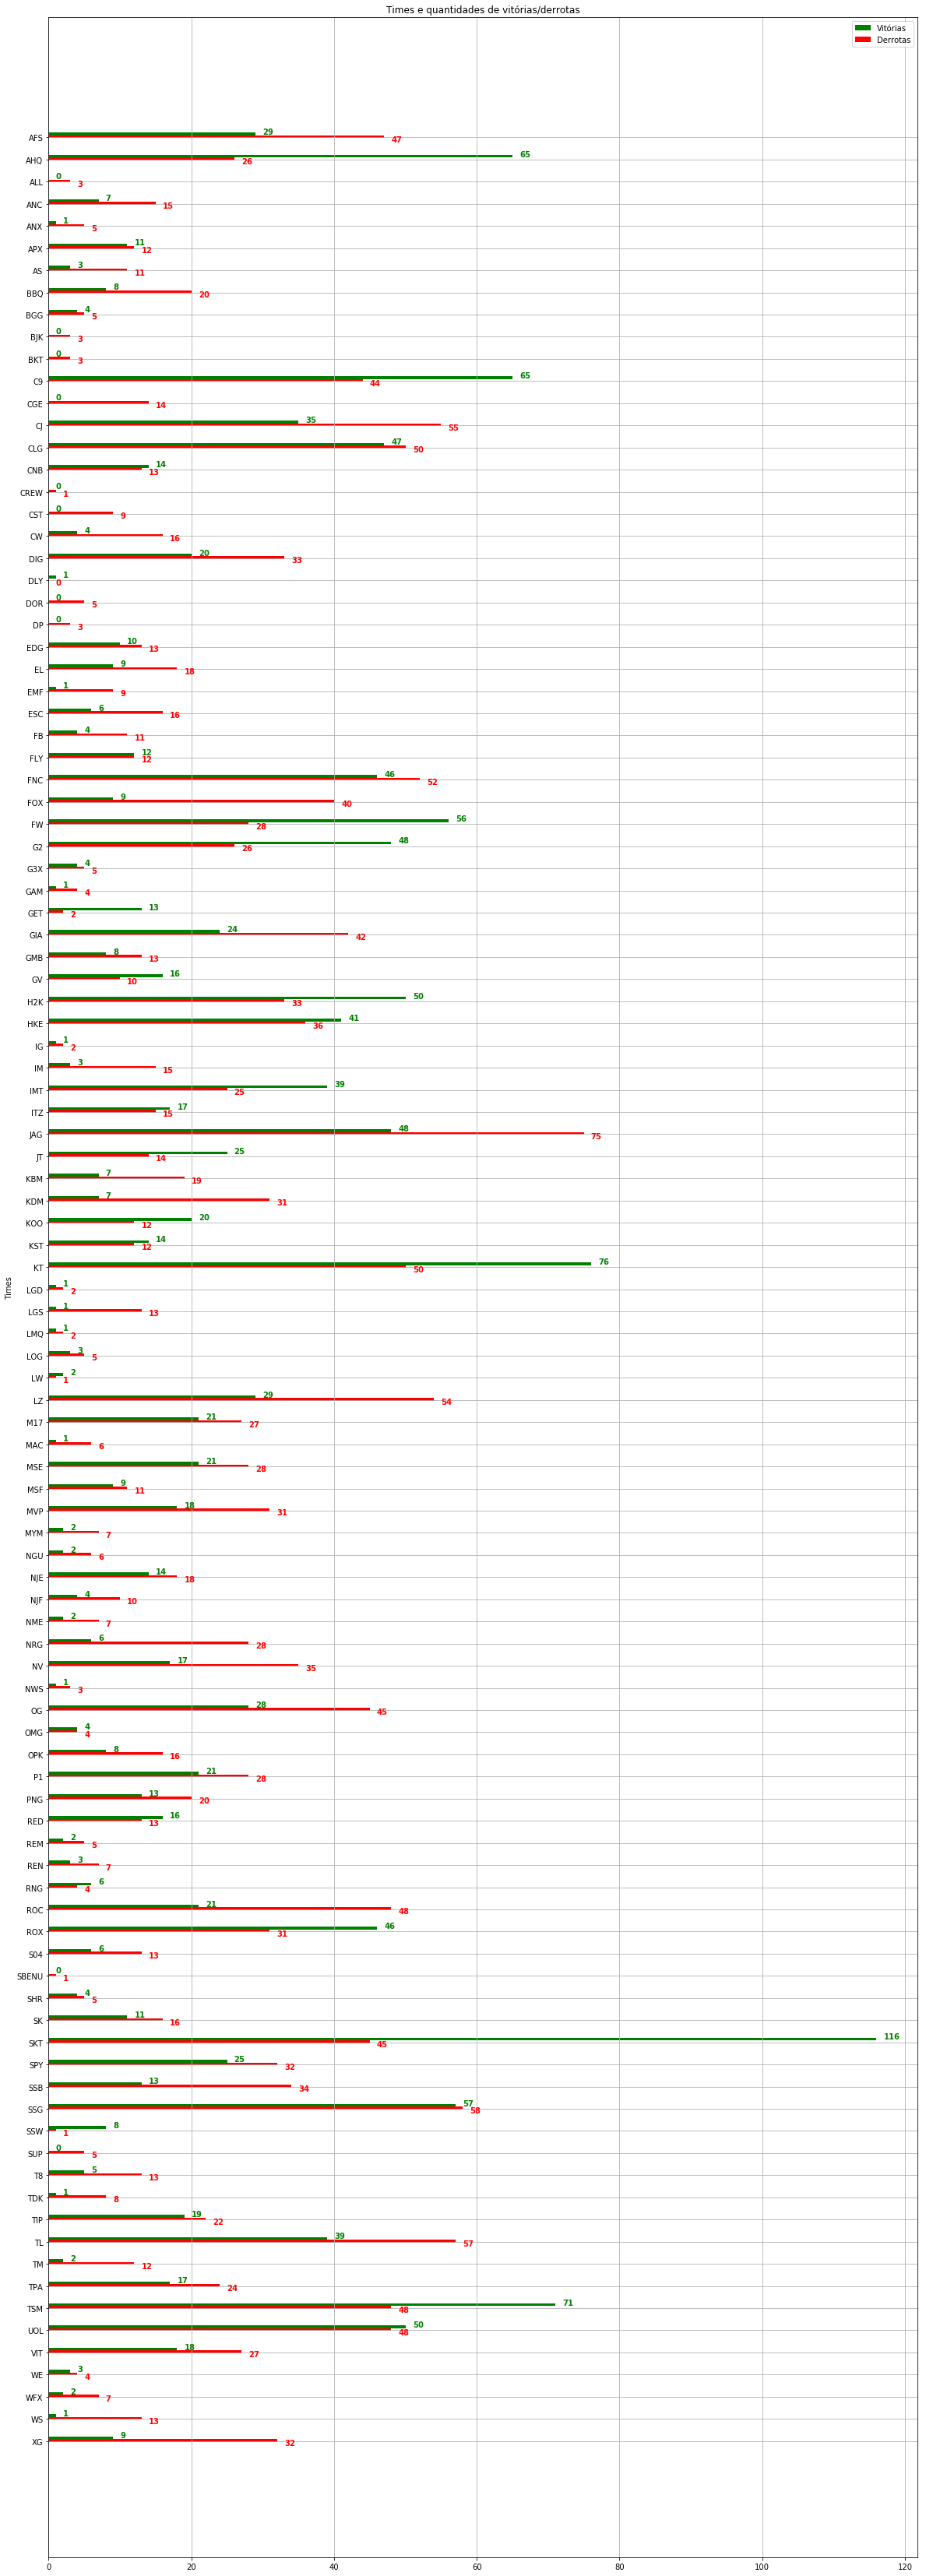

In [7]:
n = len(dic)
ind = np.arange(n)
width = 0.12

index= []
w = []
l = []
for i, (key, val) in enumerate(dic.items()):
    index.append(key)
    w.append(val[0])
    l.append(val[1])
    
fig = plt.figure(figsize=(20,60))
ax = fig.add_subplot(111)

rects1 = ax.barh(ind, w, width, color='g')
rects2 = ax.barh(ind+width, l, width, color='r')

ax.set_ylabel("Times")
ax.set_yticks(ind+width+0.03)
ax.set_yticklabels(index)
for i, v in enumerate(w):
    ax.text(v + 1, i, str(v), color='g', fontweight='bold')
for i, v in enumerate(l):
    ax.text(v + 1, i + .34, str(v), color='r', fontweight='bold')
ax.invert_yaxis()
ax.legend( (rects1[0], rects2[0]), ("Vitórias", "Derrotas") )

plt.grid()
plt.title("Times e quantidades de vitórias/derrotas")
plt.show()

In [8]:
#df das ligas
df_cblol = df[df["League"] == "CBLOL"]
df_eu = df[df["League"] == "Europe"]
df_lck = df[df["League"] == "LCK"]
df_lms = df[df["League"] == "LMS"]
df_msi = df[df["League"] == "Mid-Season_Invitational"]
df_na = df[df["League"] == "North_America"]
df_w = df[df["League"] == "Season_World_Championship"]

In [26]:
#df da Europa
df_eu15 = df_eu[df_eu["Year"] == 2015]
df_eu16 = df_eu[df_eu["Year"] == 2016]
df_eu17 = df_eu[df_eu["Year"] == 2017]
print("Total de jogos e total de cada ano (Europa):")
print("2015: {}" .format(len(df_eu15)))
print("2016: {}" .format(len(df_eu16)))
print("2017: {}" .format(len(df_eu17)))
print("Total: {}" .format(len(df_eu)))

Total de jogos e total de cada ano (Europa):
2014: 0
2015: 243
2016: 332
2017: 179
Total: 754


In [18]:
#df do Brasil
df_cblol15 = df_cblol[df_cblol["Year"] == 2015] #nulo
df_cblol16 = df_cblol[df_cblol["Year"] == 2016]
df_cblol17 = df_cblol[df_cblol["Year"] == 2017]
print("Total de jogos e total de cada ano (Brasil):")
print("2015: {}" .format(len(df_cblol15)))
print("2016: {}" .format(len(df_cblol16)))
print("2017: {}" .format(len(df_cblol17)))
print("Total: {}" .format(len(df_cblol)))

Total de jogos e total de cada ano (Brasil):
2015: 0
2016: 146
2017: 67
Total: 213


In [19]:
#df da Coreia
df_lck15 = df_lck[df_lck["Year"] == 2015]
df_lck16 = df_lck[df_lck["Year"] == 2016]
df_lck17 = df_lck[df_lck["Year"] == 2017]
print("Total de jogos e total de cada ano (Coreia):")
print("2015: {}" .format(len(df_lck15)))
print("2016: {}" .format(len(df_lck16)))
print("2017: {}" .format(len(df_lck17)))
print("Total: {}" .format(len(df_lck)))

Total de jogos e total de cada ano (Coreia):
2015: 379
2016: 467
2017: 255
Total: 1101


In [20]:
#df de Taiwan
df_lms["Year"].unique()
df_lms15 = df_lms[df_lms["Year"] == 2015]
df_lms16 = df_lms[df_lms["Year"] == 2016]
df_lms17 = df_lms[df_lms["Year"] == 2017]
print("Total de jogos e total de cada ano (Taiwan):")
print("2015: {}" .format(len(df_lms15)))
print("2016: {}" .format(len(df_lms16)))
print("2017: {}" .format(len(df_lms17)))
print("Total: {}" .format(len(df_lms)))

Total de jogos e total de cada ano (Taiwan):
2015: 197
2016: 231
2017: 112
Total: 540


In [21]:
#df do MSI
df_msi15 = df_msi[df_msi["Year"] == 2015]
df_msi16 = df_msi[df_msi["Year"] == 2016]
df_msi17 = df_msi[df_msi["Year"] == 2017]
print("Total de jogos e total de cada ano (MSI):")
print("2015: {}" .format(len(df_msi15)))
print("2016: {}" .format(len(df_msi16)))
print("2017: {}" .format(len(df_msi17)))
print("Total: {}" .format(len(df_msi)))

Total de jogos e total de cada ano (MSI):
2015: 28
2016: 41
2017: 42
Total: 111


In [22]:
#df da America do Norte
df_na15 = df_na[df_na["Year"] == 2015]
df_na16 = df_na[df_na["Year"] == 2016]
df_na17 = df_na[df_na["Year"] == 2017]
print("Total de jogos e total de cada ano (NA):")
print("2015: {}" .format(len(df_na15)))
print("2016: {}" .format(len(df_na16)))
print("2017: {}" .format(len(df_na17)))
print("Total: {}" .format(len(df_na)))

Total de jogos e total de cada ano (NA):
2015: 245
2016: 365
2017: 245
Total: 855


In [27]:
#df do Worlds
df_w14 = df_w[df_w["Year"] == 2014]
df_w15 = df_w[df_w["Year"] == 2015]
df_w16 = df_w[df_w["Year"] == 2016]
df_w17 = df_w[df_w["Year"] == 2017]  #nulo
print("Total de jogos e total de cada ano (Worlds):")
print("2014: {}" .format(len(df_w14)))
print("2015: {}" .format(len(df_w15)))
print("2016: {}" .format(len(df_w16)))
print("2017: {}" .format(len(df_w17)))
print("Total: {}" .format(len(df_w)))

Total de jogos e total de cada ano (Worlds):
2014: 78
2015: 73
2016: 77
2017: 0
Total: 228


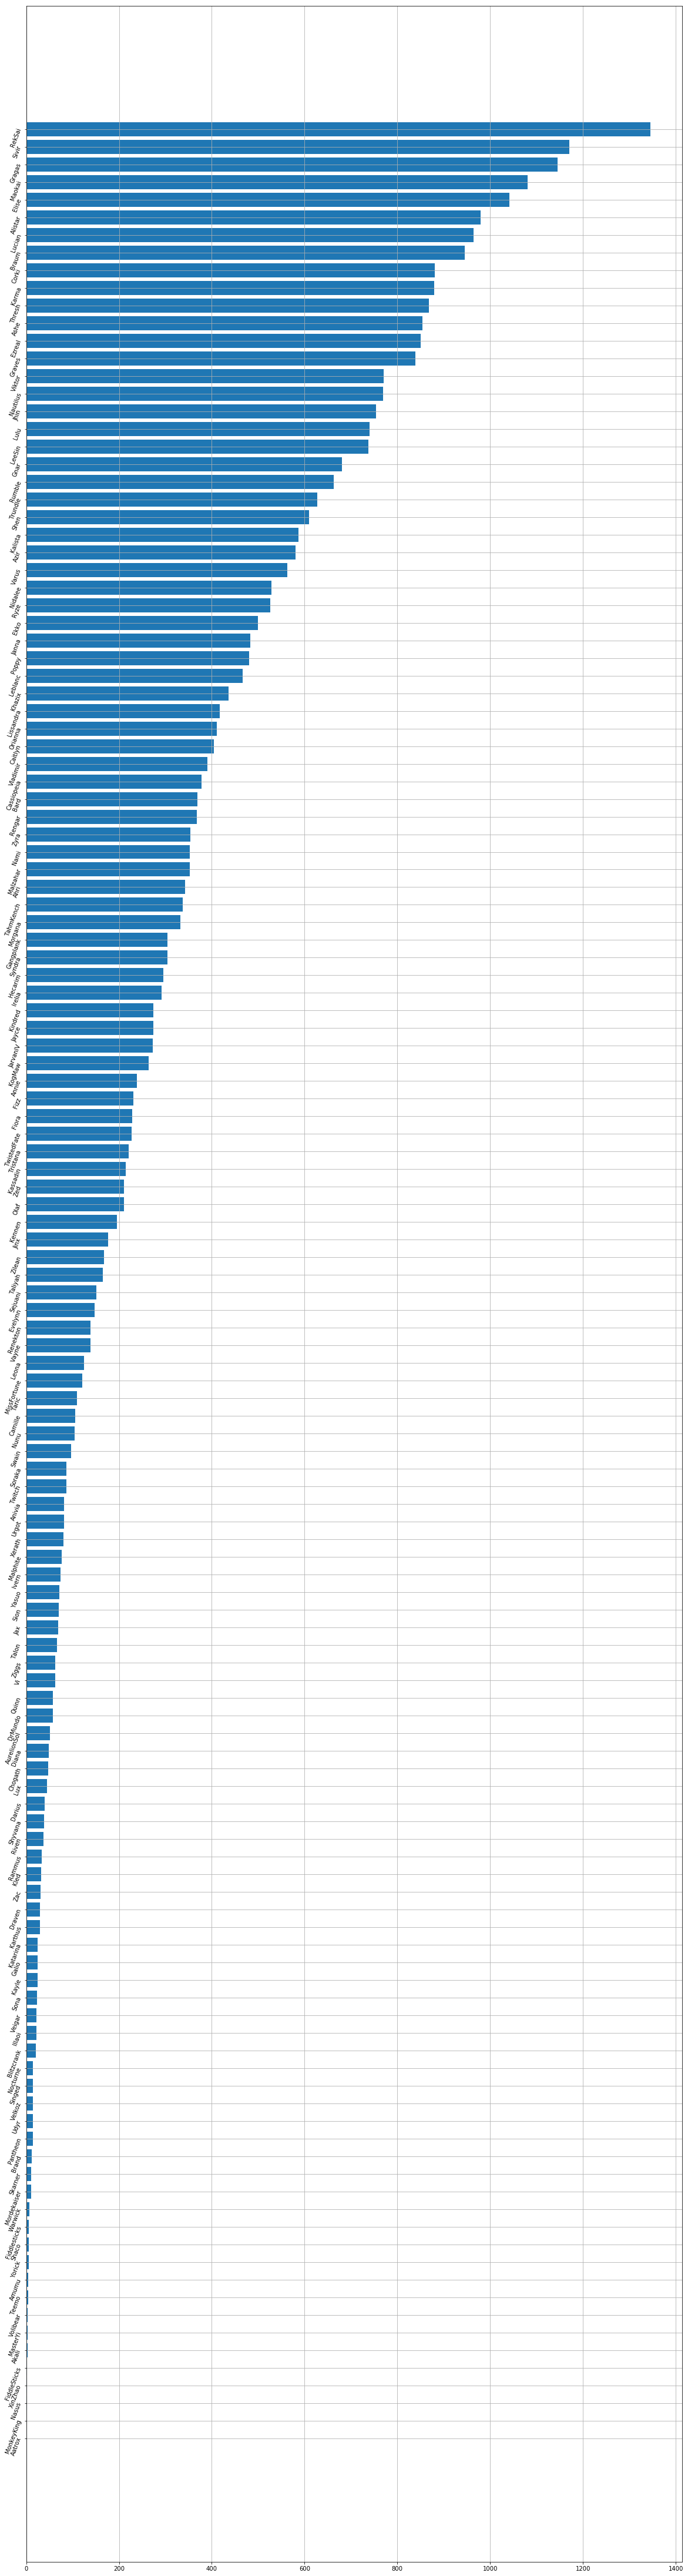

In [60]:
col = ["blueTopChamp", "blueJungleChamp", "blueMiddleChamp", "blueADCChamp", "blueSupportChamp", "redTopChamp", "redJungleChamp", "redMiddleChamp", "redADCChamp", "redSupportChamp"]
qpick = {}
for i in col:
    for j in df[i]:
        if j not in qpick:
            qpick[j] = 1
        else:
            qpick[j] += 1
            
import operator
qpick = sorted(qpick.items(), key=operator.itemgetter(1))
qpick

plt.figure(figsize=(20, 80))
plt.barh(range(len(qpick)), [val[1] for val in qpick], align='center')
plt.yticks(range(len(qpick)), [val[0] for val in qpick])
plt.yticks(rotation=70)
plt.grid()
plt.show()